Data preparation
---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
import time
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('heart.csv')
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [ ]:
target = "HeartDisease"
y = data[target]
x = data.drop(target, axis=1)
x = pd.get_dummies(x)

In [ ]:
y[y==1].count()

508

In [ ]:
y[y==0].count()

410

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
        x, y,
        train_size=0.8,
        test_size=0.2
    )

In [ ]:
ax = list()
auc_lst = list()

Tossing a die
---

In [ ]:
from sklearn.naive_bayes import GaussianNB

t0 = time.time()

model = GaussianNB()
model.fit(x_train, y_train)
model.predict_proba(x_train)

y_pred_train = model.predict(x_train)
accuracy_score(y_train, y_pred_train)

# f1 = f1_score(y_valid, y_pred)

# probs = y_pred_proba[:, 1]
# fpr, tpr, treshold = roc_curve(y_test, probs)
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC-кривая')
# plt.show()
# roc_auc = auc(fpr, tpr)

t1 = time.time()
print("Время обучения:", t1 - t0)


y_pred_train = model.predict(x_train)

y_pred = model.predict(x_test)

f1 = f1_score(y_test, y_pred)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

print("Accuracy for training data", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print('f1 score', f1)

Время обучения: 0.052573204040527344
Accuracy for training data 0.8583106267029973
Accuracy for test data: 0.8695652173913043
f1 score 0.883495145631068


Logistic Regression
---

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = model.predict(x_train)

y_pred = model.predict(x_test)

f1 = f1_score(y_test, y_pred)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

print("Accuracy for training data", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print('f1 score', f1)


Время обучения: 0.24902820587158203

Accuracy for training data 0.8651226158038147
Accuracy for test data: 0.8858695652173914
f1 score 0.8839779005524863


AUC 0.9233223062381853


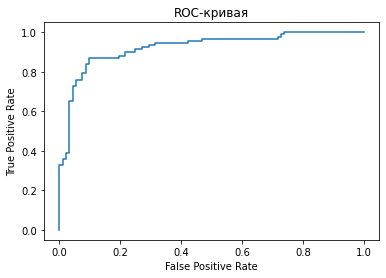

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

roc_auc = auc(fpr1, tpr1)
auc_lst.append(roc_auc)
print('AUC', roc_auc)

plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

SVC kernel = linear
---

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

model = SVC(kernel = 'linear', probability = True)
model.fit(x_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = model.predict(x_train)

y_pred = model.predict(x_test)

f1 = f1_score(y_test, y_pred)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

print("Accuracy for training data", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print('f1 score', f1)


Время обучения: 14.306233644485474

Accuracy for training data 0.8623978201634878
Accuracy for test data: 0.8858695652173914
f1 score 0.8839779005524863


AUC 0.9242674858223062


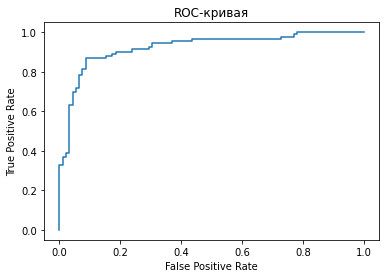

In [ ]:
fpr2, tpr2, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

roc_auc = auc(fpr2, tpr2)
auc_lst.append(roc_auc)
print('AUC', roc_auc)

plt.plot(fpr2, tpr2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Linear Discriminant Analysis
---

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

model = SVC(kernel = 'linear', probability = True)
model.fit(x_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = model.predict(x_train)

y_pred = model.predict(x_test)

f1 = f1_score(y_test, y_pred)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

print("Accuracy for training data", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print('f1 score', f1)

Время обучения: 13.246612787246704

Accuracy for training data 0.8623978201634878
Accuracy for test data: 0.8858695652173914
f1 score 0.8839779005524863


AUC 0.9242674858223062


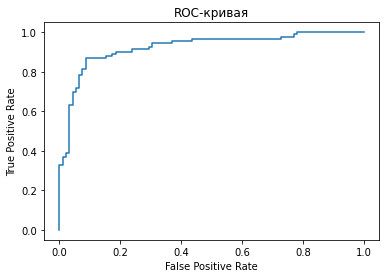

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

roc_auc = auc(fpr3, tpr3)
auc_lst.append(roc_auc)
print('AUC', roc_auc)

plt.plot(fpr3, tpr3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

K Neighbors Classifier
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

t0 = time.time()

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

y_pred_train = model.predict(x_train)

y_pred = model.predict(x_test)

f1 = f1_score(y_test, y_pred)

y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

print("Accuracy for training data", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print('f1 score', f1)

Время обучения: 0.0030333995819091797

Accuracy for training data 0.7874659400544959
Accuracy for test data: 0.7065217391304348
f1 score 0.7096774193548387


AUC 0.7647684310018904


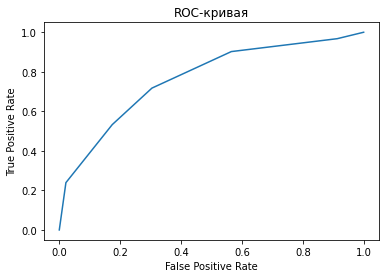

In [ ]:
fpr4, tpr4, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

roc_auc = auc(fpr4, tpr4)
auc_lst.append(roc_auc)
print('AUC', roc_auc)

plt.plot(fpr4, tpr4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

All Roc curves
---

[0.9233223062381853, 0.9242674858223062, 0.9242674858223062, 0.7647684310018904]


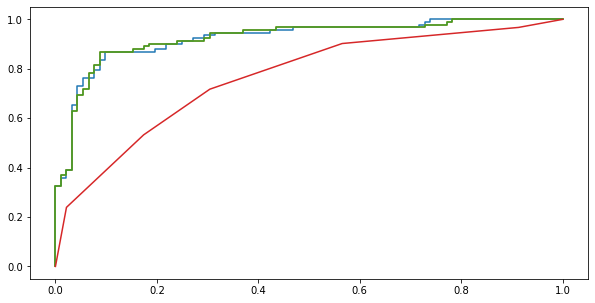

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(fpr1,tpr1, label=' dfbdf ')
ax.plot(fpr2,tpr2)
ax.plot(fpr3,tpr3)
ax.plot(fpr4,tpr4)
ax.set_label('ROC curves')
print(auc_lst)

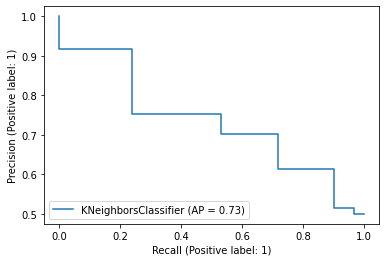

In [ ]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score
model = MLPClassifier()
model.fit(x_train, y_train) 
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)
probs = y_pred_proba[:, 1]
fpr5, tpr5, treshold = roc_curve(y_test, probs)

print("Точность на обучающей выборке", accuracy_score(y_train, y_pred_train))
print("Точность на тестовой выборке", accuracy_score(y_test, y_pred))
print("f1 score", f1)
print("AUC", auc(fpr5, tpr5))
print("Метрика average precision score", average_precision_score(y_test, y_pred))

Точность на обучающей выборке 0.8828337874659401
Точность на тестовой выборке 0.8695652173913043
f1 score 0.8636363636363636
AUC 0.9190689981096408
Метрика average precision score 0.834368530020704


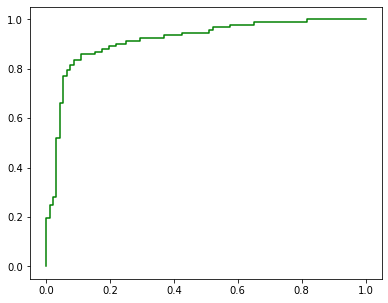

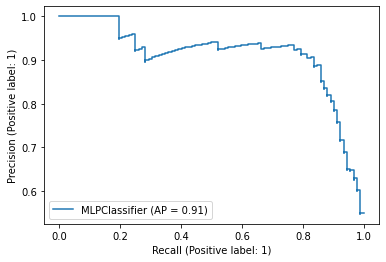

In [ ]:
fig1, ax1 = plt.subplots(1,1, figsize=(6.3,5))
ax1.plot(fpr5, tpr5, color = 'green')
PrecisionRecallDisplay.from_estimator(model, x_test, y_test)